https://leedakyeong.tistory.com/entry/Python-albumentations-%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC%EB%A5%BC-%EC%9D%B4%EC%9A%A9%ED%95%9C-Image-Agumentation

https://lcyking.tistory.com/80

In [16]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
import os
import numpy as np
from PIL import Image
import glob

In [17]:
images=glob.glob('.\data\*.png')
bboxes=glob.glob('.\data\*.txt')

images=np.array(images).tolist()
bboxes=np.array(bboxes).tolist()

hap=np.stack((images,bboxes),axis=0)

In [18]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def myfig(image,label):
    fig ,ax=plt.subplots()
    ax.imshow(image)
    
    if len(label)>0:
        dw=image.shape[0]
        dh=image.shape[1]
        
        x1=(label[0][0]-label[0][2]/2)*dw# x_center-h Ã¬Â Â„Ã¬Â²Â´Ã¬Â‚Â¬Ã¬ÂÂ´Ã¬Â¦Âˆ-Ã«Â°Â”Ã¬ÂšÂ´Ã«Â“ÂœÃ¬Â‚Â¬Ã¬ÂÂ´Ã¬Â¦Âˆ ÃªÂ°Â€Ã«Â¡ÂœÃ¬Â—Â¬Ã«Â°Â±)
        y1=(label[0][1]-label[0][3]/2)*dh# Ã¬Â„Â¸Ã«Â¡ÂœÃ¬Â—Â¬Ã«Â°Â±
        
        w=label[0][2] * dw# w*image ÃªÂ°Â€Ã«Â¡Âœ label[0][2]->object width/image with *image width =object width
        h=label[0][3] * dh# h*image Ã¬Â„Â¸Ã«Â¡Âœ object height
        
        rect=patches.Rectangle((x1,y1),w,h,linewidth=1,edgecolor='r', facecolor='none')# (x1,y1)Ã¬ÂÂ€ ÃªÂ°Â€Ã«Â¡Âœ Ã¬Â¢ÂŒÃ¬Â¸Â¡ Ã¬Â•Â„Ã«ÂžÂ˜ Ã«ÂªÂ¨Ã¬Â„ÂœÃ«Â¦Â¬        
        ax.add_patch(rect)
        
plt.show()

In [40]:
def createfolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
            pass

In [61]:
root1, method1='.\Crop_224','Crop_224'
root2, method2='.\RBC','RBC_224'
root3, method3='.\RandomRotate90'

In [62]:
def make_my_picutre(hap,root,method):
    for i in range(len(hap[0])):
        image=cv2.imread(hap[0][i])
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        bboxes=np.loadtxt(fname=hap[1][i], delimiter=" ",ndmin=2)
        bboxes=np.roll(bboxes,4, axis=1).tolist()

        IMAGE_SIZE= 340
        train_transform = A.Compose([
            #A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=1.0)
            A.Resize(300, 300), 
            A.RandomCrop(224, 224),
            #A.HorizontalFlip(p=0.5)
            #A.VerticalFlip(p=0.5)
            #A.RandomRotate90(p=1)
            #A.ShiftScaleRotate(shift_limit=0.4, scale_limit=(0.5, 0.9), rotate_limit=90, p=1, border_mode=cv2.BORDER_REPLICATE)
            #A.Cutout(p=1, num_holes=8, max_h_size=24, max_w_size=24)
            #A.Blur(p=1, blur_limit=(50, 60))
        ],bbox_params=A.BboxParams(format='yolo', min_visibility=0.4, label_fields=[]))

        transformed=train_transform(image=image, bboxes=bboxes)
        transformed_image=transformed['image']
        transformed_bboxes=transformed['bboxes']

        if i<=10:
            myfig(transformed_image,transformed_bboxes)
        transformed_image=cv2.cvtColor(transformed_image, cv2.COLOR_RGB2BGR)
        transformed_bboxes=np.roll(transformed_bboxes,1, axis=1).tolist()

        createfolder(root)
        cv2.imwrite(f"./trans1/{method}_{i+1}.png",transformed_image)
        np.savetxt(f'./trans1/{method}_{i+1}.txt', transformed_bboxes, delimiter=' ',fmt='%i %1.6f %1.6f %1.6f %1.6f')

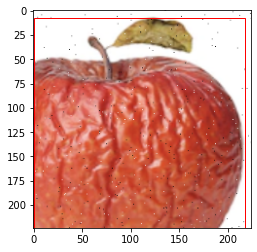

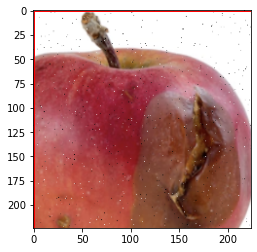

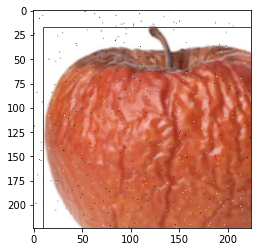

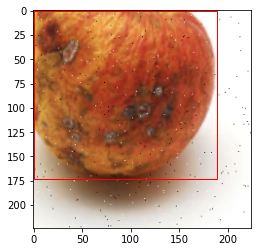

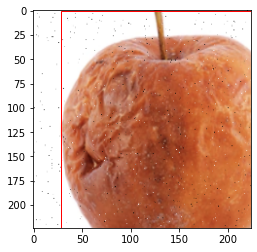

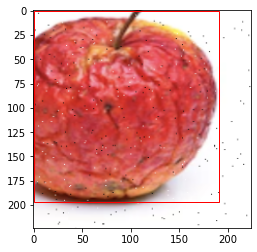

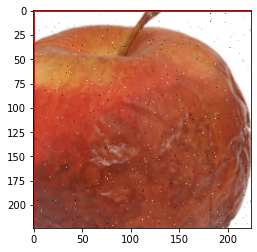

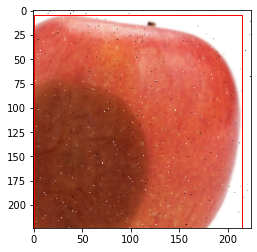

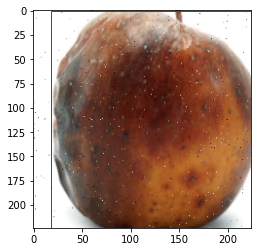

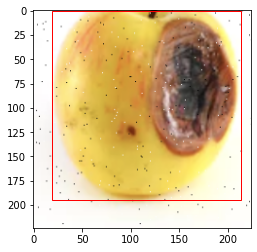

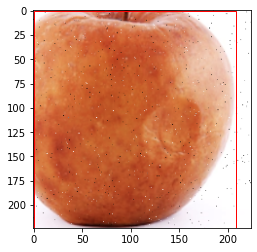

In [63]:
make_my_picutre(hap,root1,method1)

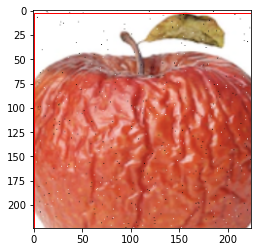

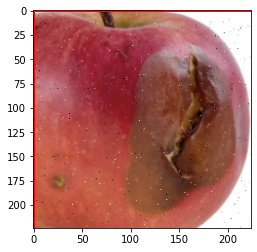

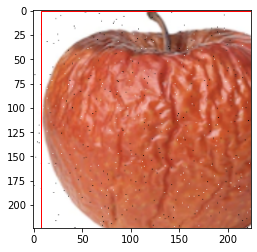

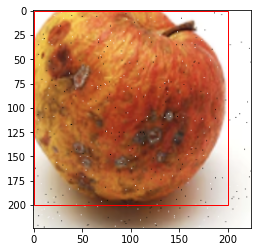

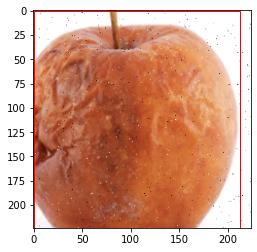

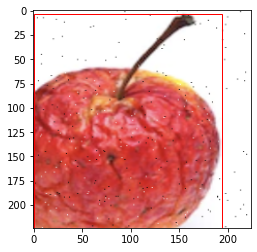

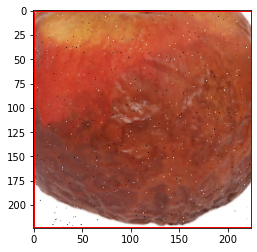

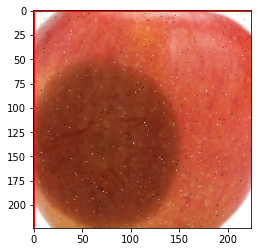

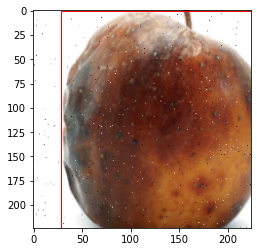

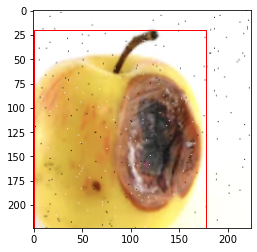

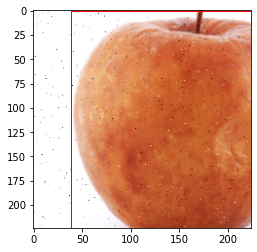

In [20]:
for i in range(len(hap[0])):
    image=cv2.imread(hap[0][i])
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    bboxes=np.loadtxt(fname=hap[1][i], delimiter=" ",ndmin=2)
    bboxes=np.roll(bboxes,4, axis=1).tolist()
    
    IMAGE_SIZE= 340
    train_transform = A.Compose([
        #A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=1.0)
        A.Resize(300, 300), 
        A.RandomCrop(224, 224),
    ],bbox_params=A.BboxParams(format='yolo', min_visibility=0.4, label_fields=[]))

    transformed=train_transform(image=image, bboxes=bboxes)
    transformed_image=transformed['image']
    transformed_bboxes=transformed['bboxes']
      
    if i<=10:
        myfig(transformed_image,transformed_bboxes)
    transformed_image=cv2.cvtColor(transformed_image, cv2.COLOR_RGB2BGR)
    transformed_bboxes=np.roll(transformed_bboxes,1, axis=1).tolist()
    
    createfolder()
    cv2.imwrite(f"./trans1/{i+1}.png",transformed_image)
    np.savetxt(f'./trans1/{i+1}.txt', transformed_bboxes, delimiter=' ',fmt='%i %1.6f %1.6f %1.6f %1.6f')